# ECE 637 Deep Learning Laboratory Instructions

**Instructions**
This Jupyter notebook document entitled **DL_Lab_Instructions** contains instructions for doing your laboratory exercise. 
A second Jupyter notebook document entited **DL_Lab_Exercises** contains all the exercises that you will need to perform.

As you read each section of this lab, you should try runing the associated code snippets. 
The colaboratory environment allows you to run code snippets locally by clicking on the play button on the left of the code. This is a wonderful feature that allows you to experiment as you read. You should take advantage of this and experiment and test different ideas, so you can become more familiar with the Python and the Jupyter programing environment. 

At the end of each sub-section, there will be exercises to perform. 
You should perform the excercise in the document DL_Lab_Exercises, which will contain all your results. 
You can then hand in your results by printing the DL_Lab_Exercises document as a pdf with all code and simulation results included.

## Section 1: Introduction to Python and Keras

This section introduces basic Python semantics. From previous labs, you are already familiar with Matlab programming,  so the lab emphasizes important differences between Python and Matlab semantics.




### Basics
Python is similar to Matlab in that variables are dynamically created, so there is no need to allocate memory. Moreover, Python variables can hold data of any type. Here are some examples.


In [0]:
# Python                                      # Matlab
x = 6          # a number (int)               x = 6
y = [1, 2, 3]  # a list                       x = [1,2,3]  Note: x here for matlab is a matrix
z = 'six'      # or "six", a string           x = 'six'
x, y, z        # print the items

(6, [1, 2, 3], 'six')

**Important**: A list in Python is different than a matrix in Matlab. A list is just a placeholder for variables of any type. So it is more like a cell array.

In [0]:
A = [1, 'one', True, 1+1, 6/9, 60//9]  # create a list
A                                      # print the list

[1, 'one', True, 2, 0.6666666666666666, 6]

In Matlab, if we want to add 1 to every entry in a matrix we do this.

```
A = [1, 1, 1]
A + 1
```
However, in Python this is not allowed:

In [0]:
A = [1, 1, 1]
# A + 1            # uncommand this line and execute this block to generate and error

The error here is simply because a **list** can only "add" with another **list**. "Add" here means concatenation.

In [0]:
A = [1, 1, 1]
A + [2]

[1, 1, 1, 2]

Also Python is a **0-index** language, which means all indices start at 0 (unlike in Matlab which starts at "1").

In [0]:
# Python                    # Matlab
A = [0, 1, 2, 3, 4]         # A = [0, 1, 2, 3, 4]       create a list/array
first = A[0]                # A(1)                      pick the first element   
last = A[-1]                # A(end)                    pick the last element
first, last

(0, 4)

**Important**: Python can have negative indexing. It basically helps to index the array from right to left, starting at "-1".

In [0]:
A = [0, 1, 2, 3, 4]
print(A[-1], A[-2], A[-3], A[-4], A[-5])
print(A[ 4], A[ 3], A[ 2], A[ 1], A[ 0])

4 3 2 1 0
4 3 2 1 0


Lists are just one of the native classes in Python. In fact **everything** in Python is an object of a class and each class comes with it's class functions. You can find the class of an object with the `type` function and you can access the class functions and class attributes with the `.` (period) operator.Here are some examples of that.

In [0]:
a = 'Hello World!'
print(type(a))   # string
a.find('l')      # class function of str that 
                 # finds the index of the first 'l'

b = a.lower()    # class function of str that 
                 # makes the string lowercase
print(a)
print(b)
print('Hello again!'.lower())     # yes, even string litrals are objects


<class 'str'>
Hello World!
hello world!
hello again!


The main data classes are **lists**, **tuples**, **dictionaries**, **strings** and **sets**. You should make yourself familiar with the syntax and the main functions associated with these classes.

#### Exercise 1.1:
Perform Exercise 1.1 in Jupyter notebook document **DL_Lab_Exercises**.



---




### Packages
Matlab is great for matrix operations and data visualization. However, in order to perform these actions in Python, you must use associated Python packages. Three commonly used Python packages are:

*   Numpy - Matrix processing package
*   Scipy - Scientific function package
*   Matplotlib - Data visualization package

In the following subsection, we will introduce these Python packages and use them to apply a low pass filter to a signal with noisy sinusoidal waves.




When you open a new python environment, the environment itself is empty. If you want to use certain packages, you need to **import** them first. There are several ways that we can import packages:

In [0]:
import numpy as np                     # import the numpy packages and use the shorter name "np"
import matplotlib.pyplot as plt        # import matplotlib's pyplot package using the alias "plt"
from scipy import signal               # import the package "signal" from scipy

Let's try to use these three packages to filter a noisy signal.  We will first  generate the input signal using numpy and matplotlib.

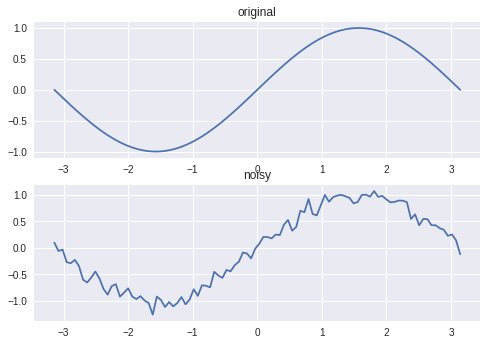

In [0]:
# Python Code                          # Matlab Code
t = np.linspace(-np.pi, np.pi, 100)    # t = linspace(-pi, pi, 100);
f = np.sin(t)                          # f = sin(t);
n = np.random.randn(100)*0.1           # n = randn(100,1)*0.1;
f_n = f+n                              # f_n = f+n;
plt.subplot(2,1,1)                     # subplot(2,1,1)
plt.plot(t,f)                          # plot(t, f)
plt.title('original')                  # title('original')
plt.subplot(2,1,2)                     # subplot(2,1,2)
plt.plot(t,f_n)                        # plot(t, f_n)
plt.title('noisy')                     # title('noisy')
plt.show()

Apply a median filter with window size 5 to our signal.

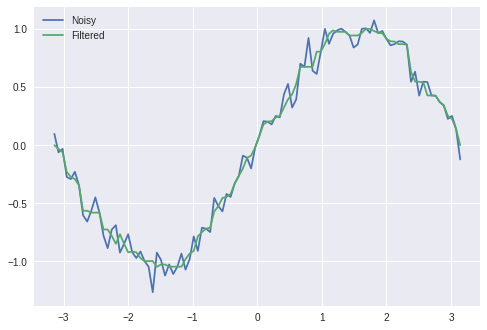

In [0]:
# Python Code
y = signal.medfilt(f_n, kernel_size = 5)
plt.plot(t, f_n, t, y)
plt.legend(('Noisy','Filtered'))
plt.show()

There also exists Python packages for neural networks and deep learning. Here are some popular packages:

*   TensorFlow (Google)
*   Pytorch (Facebook)
*   Keras (François Chollet)
*   Caffe (Berkeley)

In this lab, we will use Keras as our deep learning packages.

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

####Exercise 1.2
Perform Exercise 1.2 in Jupyter notebook document **DL_Lab_Exercises**.


---




## Section 2: Image Classfication using Dense Networks
In this section, you will learn how to build and use a fully connected or dense neural network to perform simple classification tasks on images of hand-written digits.
To do this, we will use the [MNIST data set](https://en.wikipedia.org/wiki/MNIST_database) that is included with the Keras package.

We will do this in four steps:
1. Loading data - Here we download the images into numpy arrays.

2. Constructing the network - In this step we specify the architecture of the network that we plan to use.

3. Training the network - In this step we use an optimization algorithm known as stochastic gradient descent to minimize a loss function of our choosing.

4. Testing the network - In this step, we run our test data through the network to determine the accuracy of our classifications.

### Loading Data

In the following section, we will learn how to load data for training and testing into our Keras environment. 
The following commands download the MNIST data set from the server and put the data in our workspace.

In [0]:
import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(type(train_images))
print(type(train_images[0,0,0]))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


The MNIST data set contains two arrays, "train_images" and "test_images". 
The training data will be used to train our algorithms.
However, in order to access the accuracy of our resulting classifier, we will need a separate set of testing images.

The training data has 60,000 grayscale images of size 28x28 while the testing data has 10,000 that are stored as numpy ND-arrays of `unint8` integers.

In [0]:
print(f'Training Data Shape:   {train_images.shape}')          # This is a so-called f-string
print(f'Testing Data Shape:    {test_images.shape}')

Training Data Shape:   (60000, 28, 28)
Testing Data Shape:    (10000, 28, 28)


It is often useful to reshape the data into conventional format with dimenstions (height, width, channels). Since these are gray scale images, each image image only has a single channel (as opposed to 3 with RGB images).

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(f'Training Data Shape:   {train_images.shape}')
print(f'Testing Data Shape:    {test_images.shape}')


Training Data Shape:   (60000, 28, 28, 1)
Testing Data Shape:    (10000, 28, 28, 1)


The following example shows how to visualize the first image in the training set using the "imshow" function in the matplotlib package. 


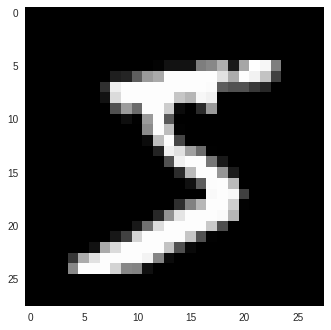

In [0]:
image = train_images[0,:,:,0]     # Select first image
plt.imshow(image, cmap='gray')  # Display as a gray scale image
ax = plt.gca()                  # Get handle to image
ax.grid(b=None)                 # Turn off grid
plt.show()                      # Show image

The MNIST data set also contains two arrays, "train_labels" and "test_labels". 
These arrays contain the "ground truth" labels for each of the digit images. 
Ground truth will be needed to both perform "supervised" training of the classifier, and then also to evaluate the accuracy of the classifier on the testing data. 

The following commands list the sizes of the two training arrays and print out the value of the first training label.

In [0]:
print(f'Training Labels Shape: {train_labels.shape}')
print(f'Testing Labels Shape:  {test_labels.shape}')

Training Labels Shape: (60000,)
Testing Labels Shape:  (10000,)


Notice that the training labels array has length 60,000, and the testing label array has length 10,000. This makes sense since there should be one label for each image. Each entry in the array contains an integer corresponding the handwritten digit. 


A quick sanity check on of the first training label shows that the first image is correctly labled with "5".

In [0]:
print(f'First label: {train_labels[0]}')

First label: 5


#### Exercise 2.1

Perform Exercise 2.1 in Jupyter notebook document DL_Lab_Exercises.



---


### Constructing the Network 
Deep neural networks typically consist of successive processing layers, with each layer formed by a linear transformation followed by a non-linear operation.
In this section, each layer of our network will be formed by a fully connected layer (Dense). 
This approach is simple, but it tends to result in networks that require a great deal of computation and many parameters to optimize.

Here is how we define a sequential model from the [**keras.models**](https://keras.io/models/about-keras-models/) package and how we add dense layers from the [**keras.layers**](https://keras.io/layers/core/) package.

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28, 1)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.



Let us go through this squence of commands in order to understand what it does.

```
network = models.Sequential()
```
* The `Sequential` function creates a placeholder named "network" for the newly created network. 
Once this is done, then we can use the following comand to sequentially add layers to the model.

```
network.add(layers.Flatten(input_shape=(28, 28, 1)))
```
*  `network.add()` - This command adds a layer to the model.
*  `input_shape=(28,28,1)` - This specifies that the input images will have size (28x28x1). This parameter only needs to be specified for the first layer. Subsequent layers infer the proper input size automatically.
* `Flatten` - Since we are using a fully connected layer first, we reshape the input tensor into a 1-D vector

```
network.add(layers.Dense(512, activation='relu'))
```
*  `layers.Dense()` - This command specifies that the layer will be a fully connected or "dense" linear network. 
*  `512` - The first argument specifies that the there will be 512 outputs to the first first layer of the network.
*  `activation='relu'` - This specifies that the non-linear activation mapping will be a rectifying linear unit commonly known as a ReLU. This is a simple and effective choice.

The next following command adds a second layer to the network:

```
network.add(layers.Dense(10, activation='softmax'))
```
The output dimension in 10 and the activation function for this layer is the "softmax" function which is a non-linear operator that converts the output into a pseudo probability distribution.

Finally, we can print a summary of our neural network we have constructed by using the command `network.summary()` as shown below. The dimenstions that are of size `None` correspond to the batch size. This also shows how many trainable parameters are in the network and where they are located.


In [0]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________




---



### Training the Network

**Optimization:** 
In order to train the network, we will run an optimization engine that minimizes a loss function that we choose. 
The key to optimization of neural networks is an algorithm called back propogation that computes the gradient of the loss function with repect to the network parameters or weights. 
The following command sets up the optimizer and sets its parameters.

In [0]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Here the optimizer we use is called "rmsprop", and the loss function is called "categorical crossentropy".
The "metrics" parameter allows us to access values during the iterations of the optimization.
The details of this optimization algorithm are complex and go beyond the scope of this lab. 
However, the beauty of Keras is that it allows you to build and train neural networks without having to deal with the details of this very important optimization process.
If you are interested in more details, you will find the following links helpful. ([Optimizer](http://ruder.io/optimizing-gradient-descent/), [Losses](https://keras.io/losses/)). 

**Data preprocessing:**

Since the weights in the neural network are initialized near zero, we also want to rescale the data into the range from 0 to 1 (i.e., roughly the same order of magnitude of the weights).  
More information about initialization of weights can be found [here](https://towardsdatascience.com/random-initialization-for-neural-networks-a-thing-of-the-past-bfcdd806bf9e).

In [0]:
train_images_nor = train_images.astype('float32') / 255
test_images_nor = test_images.astype('float32') / 255

Since we are using "categorical_crossentropy" as our loss function, we will also need to convert our labels into "categorical form".
In categorical each label is a vector of length 10, with a single 1 in the position associated with the correct class. 
This is much less effecient to store, but it offers important advantages for training the network.

In [0]:
from keras.utils import to_categorical

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

print(f'Training Labels Shape: {train_labels_cat.shape}')
print(f'Testing Labels Shape:  {test_labels_cat.shape}')

Training Labels Shape: (60000, 10)
Testing Labels Shape:  (10000, 10)


Each lable is now encoded as a 10-dimensional 1-hot vector. From above the first label, "5", is now encoded as follows:

In [0]:
print(f'train_labels_cat[0]:  {train_labels_cat[0]}')

train_labels_cat[0]:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Training:**
The `fit` command can next be used to run the optimization algorithm and train the network. 
Key parameters are defined below:
*  `train_images_nor` - This is the input data array used for training the network.
*  `train_labels_cat` - These are the labels used for training.
*  `epochs=5` - This specifies that the algorithm should run 5 epochs, where a single epoch is defined as one full pass through all the training data.
*  `batch_size=128` - This specifies that data is processed in batches of 128 training images. With each batch, a gradient update is performed for the network parameters.

In [0]:
hist = network.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2535 - acc: 0.9261
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1022 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0681 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 42us/step - loss: 0.0493 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0366 - acc: 0.9893


The optimization algorithm prints out the value of loss as well as the accuracy of the network immediately after each epoch during train. 
Notice that the final accuracy is about 99% after 5 epochs of training, which seems quite good. 
However, it isn't clear if this result can be trusted since the network was provided the correct classes in the training process.

In order to better access the networks performance, we next run it on the new testing data to see its accuracy.
This step, which is often called "inference", is run with the the network parameters that we learned from the training step.

In [0]:
test_loss, test_acc = network.evaluate(test_images_nor, test_labels_cat)
print('test_accuracy:', test_acc)

10000/10000 [==============================] - 1s 66us/step
test_accuracy: 0.9784


The accuracy on the testing data only about 98% which is lower what we obtained on the training data, but still relatively good considering that the network had not yet seen the test images.
In general, the accuracy on the training data is higher than accuracy on the testing data.
This is because the network will tend to "overfit" to the training data especially when the number of training examples is low.


#### Exercise 2.2

Perform Exercise 2.2 in Jupyter notebook document DL_Lab_Exercises.


#### Exercise 2.3
Perform Exercise 2.3 in Jupyter notebook document DL_Lab_Exercises.


---





## Section 3: Image Classification using Convolutional Neural Networks (CNN)

In this section, we will learn how to implement a convolutional neural network (CNN). 
CNN's have the advantage that they can dramatically reduce the number of parameters and the computation relative to dense networks. 
This makes it practical to implement deep neural networks containing many layers, which have been demonstrated to greatly improve accurcy in tasks such as classification. 

The code for a CNN is similar to that for a dense network. We first need to import the Keras package and download the MINIST data just like before:

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)


Next we will need to define the core structure of the CNN by using the sequential model to add layers to the network.
The layers of our CNN are organized into two distinct sections corresponding to the feature extraction and feature classification.

The **feature extraction** section consists of convolution and pooling layers that are designed to extract local features from the images that will be used in classification.
The maxpooling operations are used in order to reduce the dimension of the signal, while through the non-linear max( ) operation the most dominant features can permiate.

The **classification section** consists of dense layers used to compute the final classification of the image.
The dense layers are practical to use at this point because the dimensionality of the images has been reduced significantly. 
Finally, the softmax operation is used in the final layer in order to create an output that can be interpreted as a probability distribution over the possible classes.

The code below implements such a network using a total of 4 full layers.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
# ---- Feature extraction section
# First Layer
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# Second Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# ---- Classification section
# Rearrange the data
model.add(layers.Flatten())
# Third Layer
model.add(layers.Dense(64, activation='relu'))
# Fourth Layer
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total para

1.
* In the first layer we are feeding in images of size 28x28x1 which is specified by the `input_shape` argument. This is different than with the fully connected networks above where the images were flattened into 1D vectors of length 784. CNNs work on images in their usual 3D array representation, where the dimenstions are width, height and (color) cannel.
* The number of feature maps is set to 16 and the kernel size is 3x3. That means that the input is being convolved with 16 different trainable 3x3 kernels each yielding a different feature map.
* The max-pooling layer defines a 2D pooling operation. For each 2x2 window in the input the maximum activation is being permeated.

2.
* The second layer is similar to the first one. After these two layers the max-pooling (and boundary cropping) reduce the feature map sizes significantly from 28x28 to 13x13 and finally to 5x5, while the number of maps is being grown from 1 to 16 and finally to 32. 

3.
* In the third layer we transition to a dense network. Here the `layers.Flatten` command flattens the tensors so that they can be fed into the dense layers similar to the fully connected networks that we looked at in the previous section.

4.
* In the forth layer, again, we map the activations to a pseudo probability density using a dense layer and a soft-max non-linearitly.


Next we compile the model and train it with the `model.fit` command the same way as in the previous section.

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images_nor, train_labels_cat, epochs=5, batch_size=128)

test_loss, test_acc = model.evaluate(test_images_nor, test_labels_cat)
print('test_acc:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.2650 - acc: 0.9209
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0805 - acc: 0.9752
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0544 - acc: 0.9829
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0421 - acc: 0.9872
Epoch 5/5
10000/10000 [==============================] - 1s 80us/step
test_acc: 0.9886


This time the training accuracy is about 99.5% and the testing accuracy is about 99%. This is higher than with the fully connected network in the previous section, which was about 98% in testing. However, note that surprisingly the number of parameters in this CNN is smaller, too. The fully connected network has 407,050 parameters, while the CNN only has 56,714.

This is one of the reasons why convolutional neural network are so popular in image processing applications. 
They can dramatically reduce the number of parameters that are being used in the neural network, while achieveing a high accuracy. 

These observations show valuable benefits of CNNs. Networks with fewer parameters are generally less likely to overfit and can be more time and memory efficient.


#### Exercise 3.1
Perform Exercise 3.1 in Jupyter notebook document DL_Lab_Exercises.


---



##Section 4: Autoencoders

Autoencoders are a general class of neural networks that consist of two components: an encoder and a decoder.
The encoder takes the image and encodes it into a low dimensional vector representation. 
The decoder then takes the vector and decompresses it into something close to the original image.
Autoencoders have a variety of useful applications including denoising of images.
Moreover, they are just cool because they provide a mechanism to represent complex image content as low dimensional vectors.

Another important feature of autoencoders is that they use unsupervised training. 
In other words, they can be trained without using the training labels.
This is important because in many cases it may be difficult to obtain labeled training data or ground truth. 

In this section, we will learn how to implement a simple autoencoder using a CNN. 

### Simple autoencoders
We will first implement a simple autoencoder consisting of an encoder and decoder each formed by one dense layer. 

In order to initialize our program, we start by importing the required packages, downloading the data, reshaping the data to fit in a dense network, and then normlizing the data to the range of [0, 1].

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

The following commands construct a simple autoencoder with an encoding dimension of `encoding_dim`.
This means that the images, in this case hand written digits, are represented with high fidelily by a `encoding_dim` dimensional vector which is a lower dimensional space than the original images. 
Both the encoder and decoder are formed by a dense layer.
However, the encoder uses a ReLU and then decoder uses a sigmoid. 
The sigmoid is used for the output because it tends to be able to represent a continuously valued image more accurately, but at the cost of slightly greater complexity.

In [0]:
encoding_dim = 32
input_dim = train_images_nor.shape[1:]

# define the encoder layers
encoder = models.Sequential()
encoder.add(layers.Flatten(input_shape=input_dim))
encoder.add(layers.Dense(encoding_dim, activation='relu'))

# define the decoder layers
decoder = models.Sequential()
decoder.add(layers.Dense(input_dim[0]*input_dim[1]*input_dim[2], activation='sigmoid'))
decoder.add(layers.Reshape(input_dim))

# concatenate the encoder and decoder
autoencoder = models.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

The following comands prints out the structure of the resulting network for the encoder, the decoder, and the complete autoencoder.

In [0]:
# print out the format of the encoder and decoder
encoder.summary()
decoder.summary()
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 784)               25872     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
La

Next we compile the simple autoencoder using the "Adam" optimizer and "binary crossentropy" loss function. Then we run the training on the model for 20 epochs, with a batch size = 256.
Setting the parameter `shuffle=True`specifies that for each new epoch a new random shuffling of the batches will occur. This helps to speed convergence of the training.

In [0]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history = autoencoder.fit(train_images_nor, train_images_nor, 
                epochs=20, 
                batch_size=256,
                shuffle=True)



Epoch 1/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0696
Epoch 2/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0354
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0267
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0215
Epoch 5/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0181
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0158
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0142
Epoch 8/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0130
Epoch 9/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0122
Epoch 10/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0116
Epoch 11/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0113
Epoch 12/20
60000/60000 [===========================

Next we plot the loss function, in this case Root Mean Squared Error, as a function of the epoch number

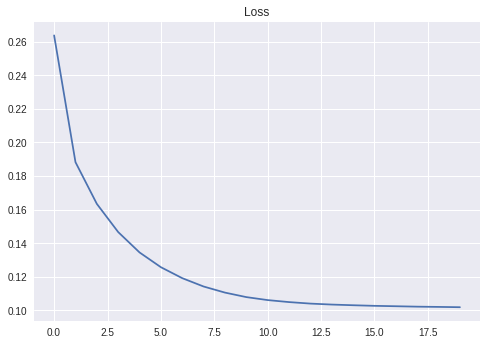

10000/10000 [==============================] - 1s 59us/step
test_acc: 0.010021420869231225


In [0]:
plt.plot(np.sqrt(history.history['loss']))
plt.title('Loss')
plt.show()

test_loss = autoencoder.evaluate(test_images_nor, test_images_nor)
print('test_acc:', test_loss) 

The following function helps us plot the input images, the encoded representation and the reconstructed images.

In [0]:
def showImages(input_imgs, encoded_imgs, output_imgs, size=1.5, groundTruth=None):

  numCols = 3 if groundTruth is None else 4
  
  num_images = input_imgs.shape[0]
      
  encoded_imgs = encoded_imgs.reshape((num_images, 1, -1))
    

  plt.figure(figsize=((numCols+encoded_imgs.shape[2]/input_imgs.shape[2])*size, num_images*size))

  pltIdx = 0
  col = 0
  for i in range(0, num_images):

    col += 1
    # plot input image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(input_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Input Image')

    # plot encoding
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(encoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Encoded Image')

    # plot reconstructed image
    pltIdx += 1
    ax = plt.subplot(num_images, numCols, pltIdx)
    plt.imshow(output_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if col == 1:
      plt.title('Reconstructed Image')
  
    if numCols == 4:
      # plot ground truth image
      pltIdx += 1
      ax = plt.subplot(num_images, numCols, pltIdx)
      plt.imshow(groundTruth[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      
      if col == 1:
        plt.title('Ground Truth')

  plt.show()

And with that we can plot the first couple of images from the test data set and the corresponding encodings and reconstructions. The `predict` function helps us feed the test images through the network. We sort the images by their label so same-class examples are next to one another. Note that similar images also have similar encoding vectors.

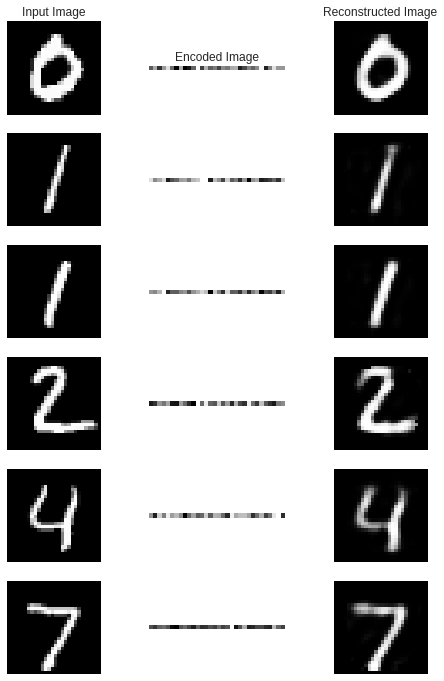

In [0]:
num_images = 6

input_labels = test_labels[0:num_images]
I = np.argsort(input_labels)

input_imgs = test_images[I]

encoded_imgs = encoder.predict(test_images_nor[I])
output_imgs = decoder.predict(encoded_imgs)


showImages(input_imgs, encoded_imgs, output_imgs, size=2)

### CNN autoencoders
In this section, we demonstrate how to use CNNs for autoencoders.
First we import the data and required packages.
Then we reshape and scale the images.

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images_nor = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images_nor = test_images.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

Next we build the models for both the encoder and decoder. Note that the middle section resembles the fully connected autoencoder from above. But here we are using a contractive concolutional section in front and a expansive convolutional section in the back of the network.
This makes the fully connected section have fewer parameters due to lower dimensionality. The encoding dimesion is still `encoding_dim` as before. So information passes through the same sized bottleneck.

In [0]:
# Build Encoder
encoder = models.Sequential()
encoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=train_images.shape[1:]))
encoder.add(layers.MaxPooling2D((2, 2),                  padding='same'))
encoder.add(layers.Conv2D(16, (3, 3),  activation='relu', padding='same'))
encoder.add(layers.MaxPooling2D((2, 2),                  padding='same'))
encoder.add(layers.Conv2D(8, (3, 3),  activation='relu', padding='same', name='convOutput'))

encoder.add(layers.Flatten())
encoder.add(layers.Dense(encoding_dim, activation='relu'))


# shape considerations
convShape = encoder.get_layer('convOutput').output_shape[1:]
denseShape = convShape[0]*convShape[1]*convShape[2]


# Build Decoder
decoder = models.Sequential()
decoder.add(layers.Dense(denseShape, input_shape=(encoding_dim,)))
decoder.add(layers.Reshape(convShape))

decoder.add(layers.Conv2D(8, (3, 3),  activation='relu',    padding='same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(16, (3, 3),  activation='relu',    padding='same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(32, (3, 3), activation='relu',    padding='same'))
decoder.add(layers.Conv2D(1, (3, 3),  activation='sigmoid', padding='same'))


Then we build the autoencoder by putting the encoder and decoder together, and we print out the resulting model.

In [0]:
# Build Autoencoder
autoencoder = models.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

encoder.summary()
decoder.summary()
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
convOutput (Conv2D)          (None, 7, 7, 8)           1160      
_________________________________________________________________
flatten_4 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                12576     
Total para

Next we compile the simple autoencoder using the "Adam" optimizer and "binary crossentropy" loss function. Then we run the training on the model for 20 epochs, with a batch size = 256.
Setting the parameter `shuffle=True` specifies that for each new epoch a new random shuffling of the batches will occur. This helps to speed convergence of the training.

In [0]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history = autoencoder.fit(train_images_nor, train_images_nor, 
                epochs=20, 
                batch_size=256,
                shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0600
Epoch 2/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0214
Epoch 3/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0163
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0141
Epoch 5/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0129
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0122
Epoch 7/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.0116
Epoch 8/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0112
Epoch 9/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0109
Epoch 10/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0106
Epoch 11/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0103
Epoch 12/20
60000/60000 [================

Next we plot the loss function, in this case Root Mean Squared Error, as a function of the epoch number

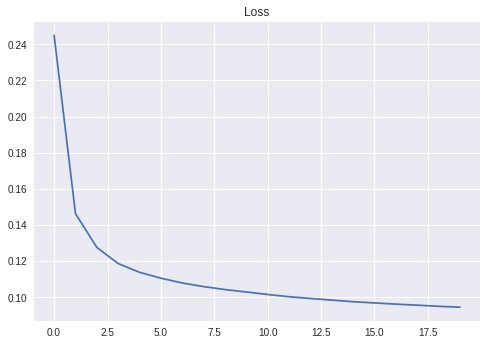

10000/10000 [==============================] - 1s 131us/step
test_acc: 0.008595911006629467


In [0]:
plt.plot(np.sqrt(history.history['loss']))
plt.title('Loss')
plt.show()

test_loss = autoencoder.evaluate(test_images_nor, test_images_nor)
print('test_acc:', test_loss)

And again we can plot the first couple of images from the test data set and the corresponding encodings and reconstructions.
This time we achieve higher accuracy with fewer parameters. 

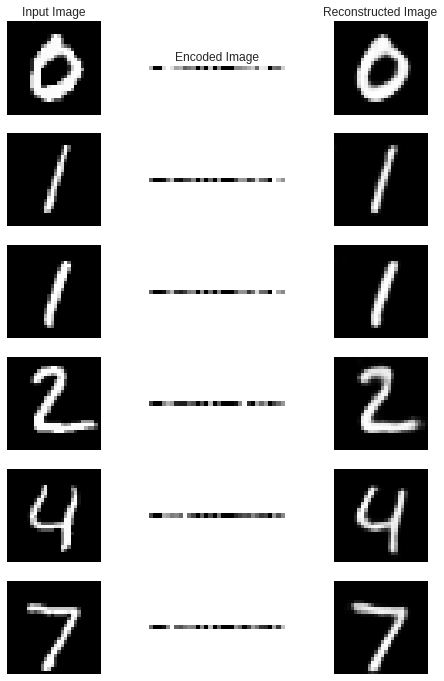

In [0]:
num_images = 6

input_labels = test_labels[0:num_images]
I = np.argsort(input_labels)

input_imgs = test_images[I]

encoded_imgs = encoder.predict(test_images_nor[I])
output_imgs = decoder.predict(encoded_imgs)


showImages(input_imgs, encoded_imgs, output_imgs, size=2)

### Exercise 4.1
Perform Exercise 4.1 in Jupyter notebook document **DL_Lab_Exercises**.